# Weather Data Analysis 2025
Acest notebook încarcă datele meteo, extrage luna din data, calculează temperatura medie pe lună și salvează un grafic în folderul dashboard.

✅ Coloane găsite: ['Location', 'Date_Time', 'Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']


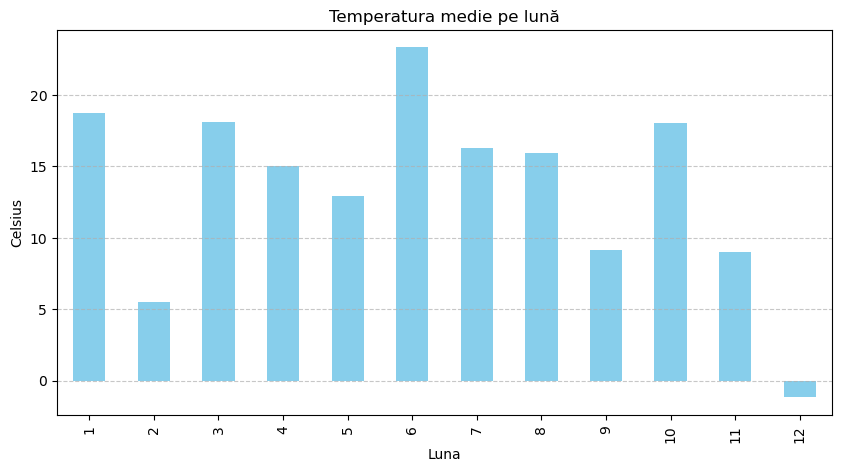

✅ Grafic salvat la: ../dashboard/weather_monthly_avg.png


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Calea către fișierul CSV (relativă la acest notebook)
file_path = '../data/weather.csv'

# Verifică dacă fișierul există
if not os.path.exists(file_path):
    raise FileNotFoundError(f'❌ Fișierul nu a fost găsit la: {file_path}')

# Încarcă datele
data = pd.read_csv(file_path)
print('✅ Coloane găsite:', data.columns.tolist())

# Curățare valori lipsă
data = data.dropna()

# Creare coloană 'Month' din 'Date_Time'
data['Month'] = pd.to_datetime(data['Date_Time']).dt.month

# Calcul temperatură medie pe lună
monthly_avg = data.groupby('Month')['Temperature_C'].mean()

# Creare grafic
plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Temperatura medie pe lună')
plt.ylabel('Celsius')
plt.xlabel('Luna')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Salvare grafic
output_path = '../dashboard/weather_monthly_avg.png'
os.makedirs(os.path.dirname(output_path), exist_ok=True)
plt.savefig(output_path)
plt.show()

print(f'✅ Grafic salvat la: {output_path}')